# Classical Statistics Modeling in Python with statsmodels

Most popular package for modeling is scikit learn. Scikit-learn is not the best for a 'traditional' stats approach.

The statsmodels library is designed for traditional statistics models like linear regression and logistic regression.

Be sure to visit and read the documentation on the StatsModels website: https://www.statsmodels.org/stable/index.html

In [1]:
# statsmodels.api uses numpy array notation
# statsmodels.formula.api use formula notation (similar to R's formula notation)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

# A minimal OLS example

Four pairs of points

In [2]:
x = np.array([1,2,3,4])
y = np.array([2,6,4,8])

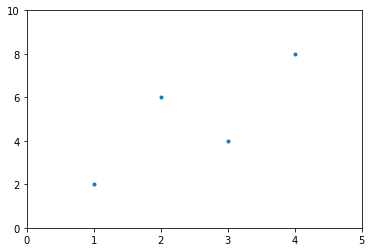

In [3]:
plt.scatter(x,y, marker = '.')
plt.xlim(0,5)
plt.ylim(0,10)
plt.show()

In [4]:
# make a dataframe of our data
d = pd.DataFrame({'x':x, 'y':y})
print(d)

   x  y
0  1  2
1  2  6
2  3  4
3  4  8


Seaborn lmplot

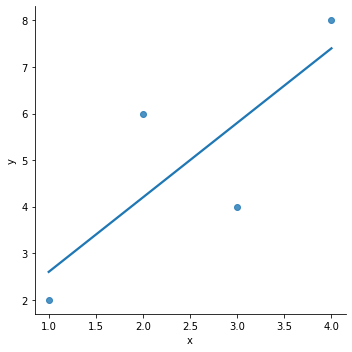

In [5]:
sns.lmplot(x = 'x', y = 'y', data = d, ci = False)

In [6]:
np.mean(x)

2.5

In [7]:
np.mean(y)

5.0

In [8]:
np.std(x, ddof = 1)

1.2909944487358056

In [9]:
np.std(y, ddof = 1)

2.581988897471611

In [10]:
np.corrcoef(x, y)

array([[1. , 0.8],
       [0.8, 1. ]])

In [11]:
# manual calculation of slope: b1 = r * sy / sx
0.8 * np.std(y, ddof = 1) / np.std(x, ddof = 1)

1.6000000000000003

In [12]:
# manual calculation of intercept: b0 = ybar - b1 * xbar
5 - 1.6 * 2.5

1.0

## formula notation with statsmodels
use statsmodels.formula.api (often imported as smf)

In [13]:
# data is in a dataframe
model = smf.ols('y ~ x', data = d)

In [14]:
print(model)

In [15]:
# estimation of coefficients is not done until you call fit() on the model
results = model.fit()

In [16]:
print(results)

In [17]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     3.556
Date:                Fri, 04 Mar 2022   Prob (F-statistic):              0.200
Time:                        09:44:49   Log-Likelihood:                -6.8513
No. Observations:                   4   AIC:                             17.70
Df Residuals:                       2   BIC:                             16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0000      2.324      0.430      0.7

C:\Users\miles\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


Using the abline_plot function for plotting the results

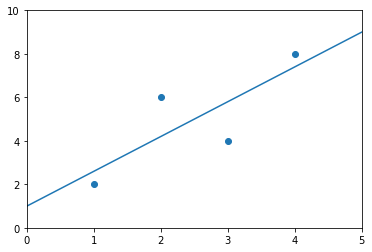

In [18]:
sm.graphics.abline_plot(model_results = results)
plt.scatter(d.x, d.y)

plt.xlim(0,5)
plt.ylim(0,10)

plt.show()

Generating an anova table

In [19]:
print(sm.stats.anova_lm(results))

           df  sum_sq  mean_sq         F  PR(>F)
x         1.0    12.8     12.8  3.555556     0.2
Residual  2.0     7.2      3.6       NaN     NaN


Making predictions

In [20]:
results.predict({'x' : 2})

0    4.2
dtype: float64

## numpy array notation
similar to sklearn's notation

In [21]:
print(x)

[1 2 3 4]


In [22]:
X = sm.add_constant(x)  # need to add a constant for the intercept term.
# because we are using the numpy notation, we use sm rather than smf

In [23]:
print(X)

[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]]


$$y_i = \beta_0 + \beta_1 x_i + \epsilon_i$$

$$\mathbf{\hat{Y}} =\mathbf{X} \boldsymbol{\beta}$$


In [24]:
y

array([2, 6, 4, 8])

In [25]:
model2 = sm.OLS(y, X)  # OLS is capitalized in the numpy notation

In [26]:
results2 = model2.fit()

In [27]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     3.556
Date:                Fri, 04 Mar 2022   Prob (F-statistic):              0.200
Time:                        09:44:49   Log-Likelihood:                -6.8513
No. Observations:                   4   AIC:                             17.70
Df Residuals:                       2   BIC:                             16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0000      2.324      0.430      0.7

C:\Users\miles\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


OLS solution:

$$(X^TX)^{-1}X^TY$$

In [28]:
X

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.]])

In [29]:
np.linalg.inv(X.T @ X) @ (X.T @ y)

array([1. , 1.6])

## Simple Linear Regression Example with Olympic data

In [30]:
# winning time of the mens 100 meter dash
olympic = pd.read_csv("https://raw.githubusercontent.com/sdrogers/fcmlcode/master/R/data/olympics/male100.csv", names = ["year","time"])

In [31]:
olympic

,year,time
0,1896,12.00
1,1900,11.00
2,1904,11.00
3,1906,11.20
4,1908,10.80
5,1912,10.80
6,1920,10.80
7,1924,10.60
8,1928,10.80
9,1932,10.30


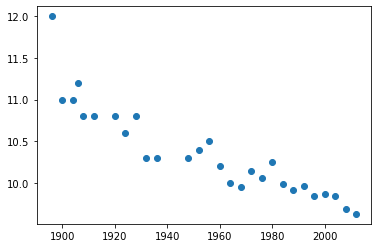

In [32]:
plt.scatter('year', 'time', data = olympic)
plt.show()

#### With formula api

In [33]:
olympic_model = smf.ols('time ~ year', data = olympic)
results = olympic_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     123.1
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           2.34e-11
Time:                        09:44:50   Log-Likelihood:                 2.6222
No. Observations:                  28   AIC:                            -1.244
Df Residuals:                      26   BIC:                             1.420
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3091      2.339     15.523      0.0

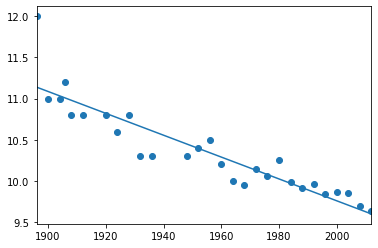

In [34]:
sm.graphics.abline_plot(model_results = results)
plt.scatter(olympic.year, olympic.time)
plt.show()

#### With statsmodels api

In [35]:
array_year = sm.add_constant(olympic.year)
mod = sm.OLS(olympic.time, array_year)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     123.1
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           2.34e-11
Time:                        09:44:50   Log-Likelihood:                 2.6222
No. Observations:                  28   AIC:                            -1.244
Df Residuals:                      26   BIC:                             1.420
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3091      2.339     15.523      0.0

## Logistic Regression Example

In [36]:
# fictional dataset showing potential relationship between age and congestive heart disease.
chd = pd.read_csv("chdage.csv")

In [37]:
# the variable CHD is recorded as 0 or 1.
# pd.Categorical makes the data categorical rather than integer
chd.CHD = pd.Categorical(chd.CHD)

In [38]:
chd

,AGE,CHD
0,20,0
1,23,0
2,24,0
3,25,1
4,25,0
...,...,...
95,63,1
96,64,1
97,64,0
98,65,1


In [39]:
# change in data type is reflected here.
chd.dtypes

AGE       int64
CHD    category
dtype: object

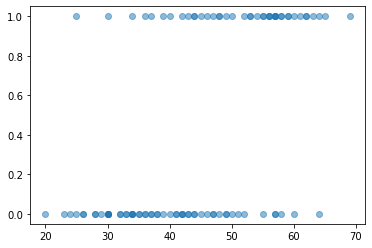

In [40]:
plt.scatter(chd.AGE, chd.CHD, alpha = 0.5)

<AxesSubplot:xlabel='AGE', ylabel='CHD'>

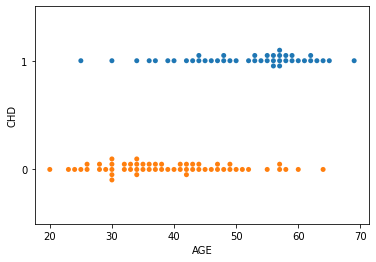

In [41]:
# seaborn swarm plot shows the density of values
sns.swarmplot(x = "AGE", y = "CHD", data = chd, orient = "horizontal", order = [1,0])

<AxesSubplot:xlabel='AGE', ylabel='CHD'>

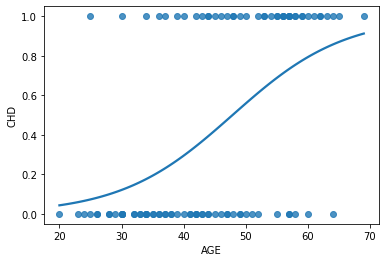

In [42]:
# shows potential logistic regression curve
sns.regplot(x="AGE", y="CHD", data=chd, logistic=True, ci=None)

$$y_i = 1 / \exp( - (\beta_0 + \beta_1 x_i + \epsilon_i) )$$

$$\mathbf{\hat{Y}} =1 / \exp( -\mathbf{X} \boldsymbol{\beta})$$


In [43]:
array_age = sm.add_constant(chd.AGE)
log_reg = sm.Logit(chd.CHD, array_age).fit()

Optimization terminated successfully.
         Current function value: 0.536765
         Iterations 6


In [44]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                    CHD   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Mar 2022   Pseudo R-squ.:                  0.2145
Time:                        09:44:50   Log-Likelihood:                -53.677
converged:                       True   LL-Null:                       -68.331
Covariance Type:            nonrobust   LLR p-value:                 6.168e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.3095      1.134     -4.683      0.000      -7.531      -3.088
AGE            0.1109      0.024      4.610      0.000       0.064       0.158


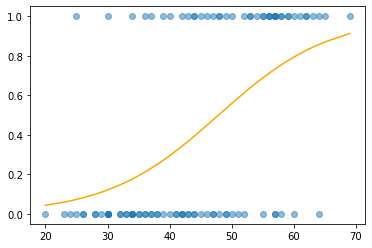

In [45]:
plt.scatter(chd.AGE, chd.CHD, alpha = 0.5)
plt.plot(chd.AGE, log_reg.predict(), color = "orange")
plt.show()